# Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from utils import average_hour

In [2]:
data_dir = "../InterpolationBaseline/data/Oct0123_Jan3024/"

# Prepare Data

In [3]:
data_files = [file for file in os.listdir(data_dir) if file.endswith(".csv")]
data_dfs = []

for i, file in enumerate(data_files):
    df = pd.read_csv(data_dir + file)
    df = average_hour(df)

    # remove sensors with missing data
    if len(df) < 2928:
        print("File{}: {} contains missing hours".format(i, file))
        continue

    # remove sensors with outliers
    if df["pm25"].max() > 500:
        print("File{}: {} contains outliers".format(i, file))
        continue

    data_dfs.append(df)

File1: 6kzhfU9xTKCUVJMz492l2g.csv contains outliers
File8: OfAvTbS1SiOjQo4WKSAP9g.csv contains missing hours
File17: wSo2iRgjT36eWC4a2joWZg.csv contains outliers
File19: jDYxIP2JQL2br5aTIAR7JQ.csv contains outliers
File21: 4XEJFVFOS761cvyEjOYf0g.csv contains outliers
File22: 3BAGEmnnQ2K4zF49Dkkoxg.csv contains missing hours
File26: 6nBLCf6WT06TOuUExPkBtA.csv contains missing hours
File36: R2ebpAblQHylOjteA-2hlQ.csv contains missing hours
File43: JQ1px-xqQx-xKh3Oa5h9nA.csv contains missing hours
File50: kyRUtBOTTaK7V_-dxOJTwg.csv contains outliers


# Monthly Analysis

In [5]:
def get_month_data(dfs, month=10):
    month_data = []
    for df in dfs:
        df_month = df[df["month"] == month]
        month_data.append(df_month["pm25"].to_numpy())
    return np.array(month_data)

(41, 744)


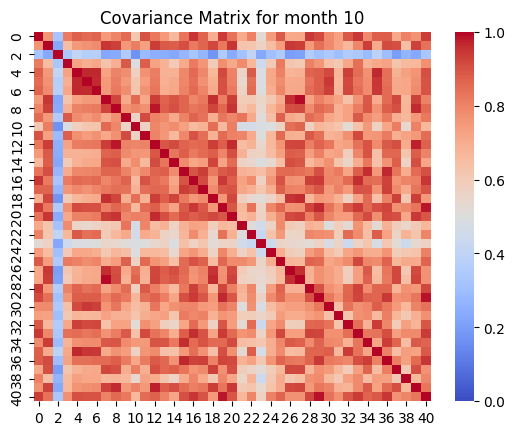

(41, 720)


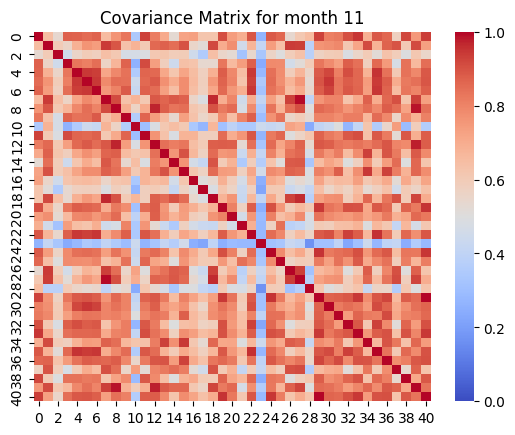

(41, 744)


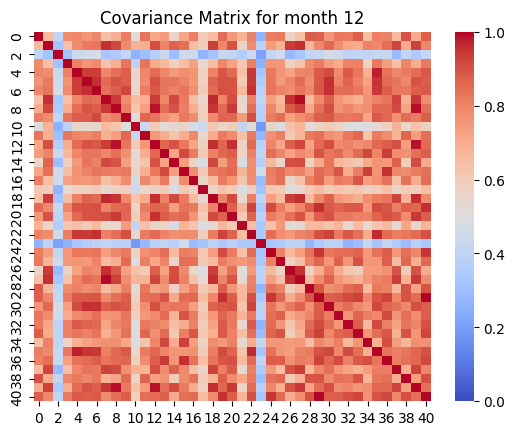

(41, 720)


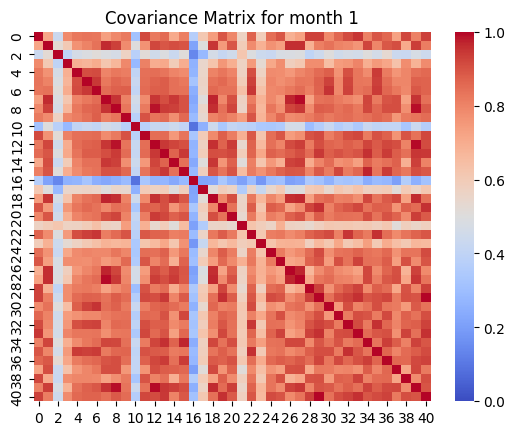

In [6]:
for month in [10, 11, 12, 1]:
    month_data = get_month_data(data_dfs, month)
    print(month_data.shape)
    month_cov = np.corrcoef(month_data, rowvar=True)
    sns.heatmap(month_cov, cmap="coolwarm", vmin=0, vmax=1)
    plt.title("Covariance Matrix for month {}".format(month))
    plt.show()

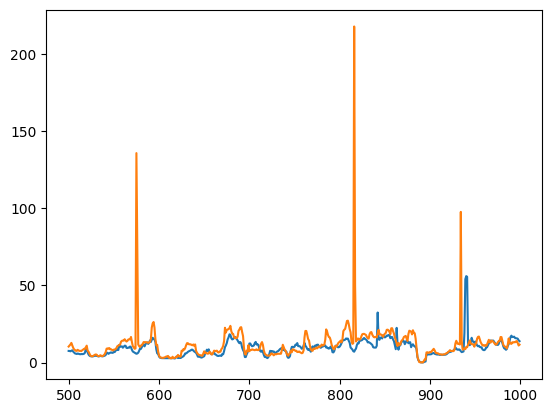

In [25]:
plt.plot(data_dfs[16]["pm25"][500: 1000])
plt.plot(data_dfs[23]["pm25"][500: 1000])
# print(np.corrcoef(data_dfs[16]["pm25"], data_dfs[23]["pm25"]))
plt.show()


(array([ 2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,
         6.,  4.,  4.,  2.,  6.,  8.,  6.,  4., 10.,  4.,  4.,  6.,  4.,
         8.,  8.,  4.,  4., 10.,  6.,  2.,  2., 12.,  8.,  6., 16., 12.,
         8.,  6., 12.,  6.,  4., 12., 10., 14.,  2.,  4., 12.,  6., 18.,
        18., 10., 18., 14., 14., 30., 10., 10.,  6.,  6.,  8., 10.,  6.,
        18., 14., 12., 16.,  8., 20., 16., 20., 14., 26., 26., 60., 52.,
        44., 36., 62., 68., 84., 54., 44., 52., 56., 32., 66., 58., 42.,
        50., 42., 30., 28., 22., 10.,  0.,  4., 47.]),
 array([0.08692942, 0.09606013, 0.10519084, 0.11432154, 0.12345225,
        0.13258295, 0.14171366, 0.15084436, 0.15997507, 0.16910578,
        0.17823648, 0.18736719, 0.19649789, 0.2056286 , 0.21475931,
        0.22389001, 0.23302072, 0.24215142, 0.25128213, 0.26041283,
        0.26954354, 0.27867425, 0.28780495, 0.29693566, 0.30606636,
        0.31519707, 0.32432777, 0.33345848, 0.34258919, 0.35171989,
        0.3608506 , 0.3699

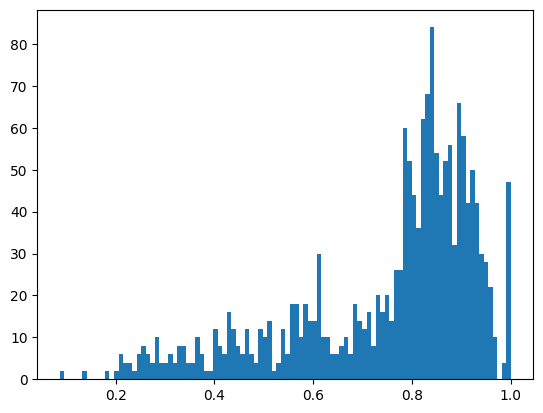

In [13]:
plt.hist(month_cov.flatten(), bins=100)

In [23]:
(month_cov >= 0.8).sum()

927